# SVM

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [3]:
from sklearn.datasets import make_blobs

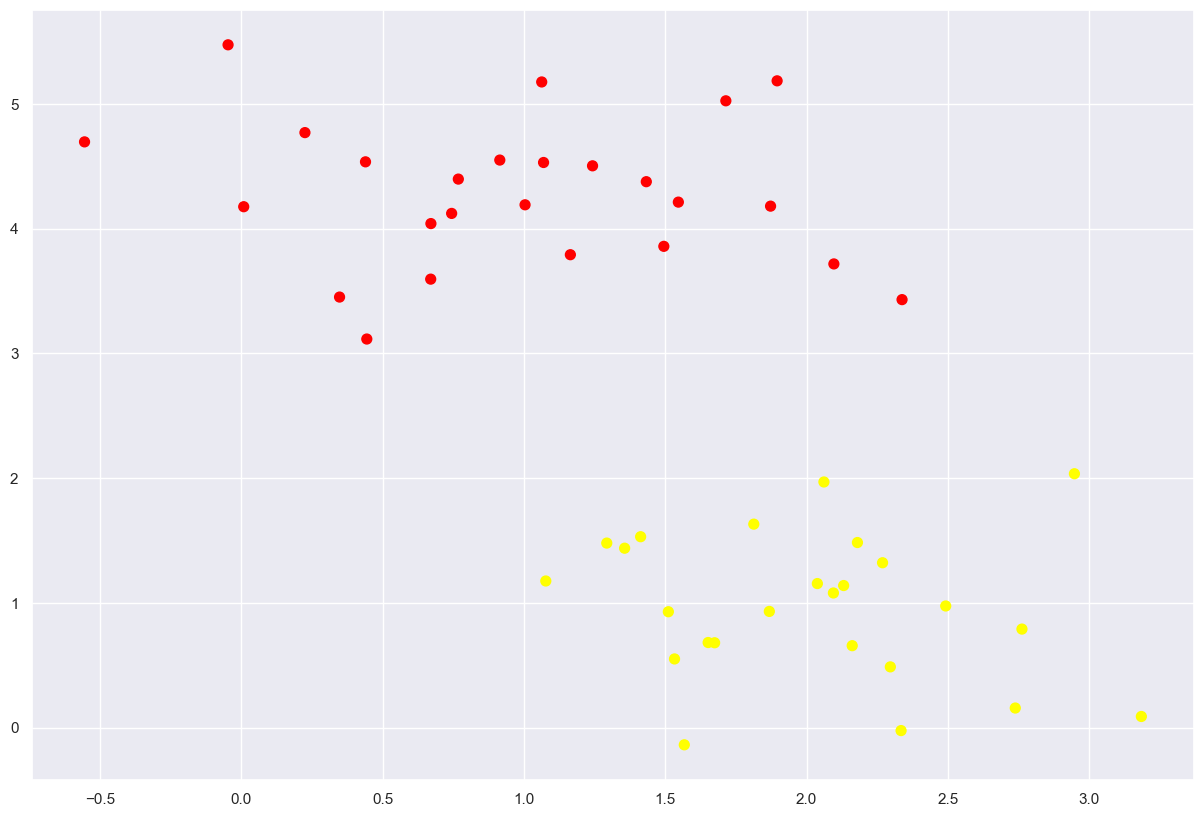

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

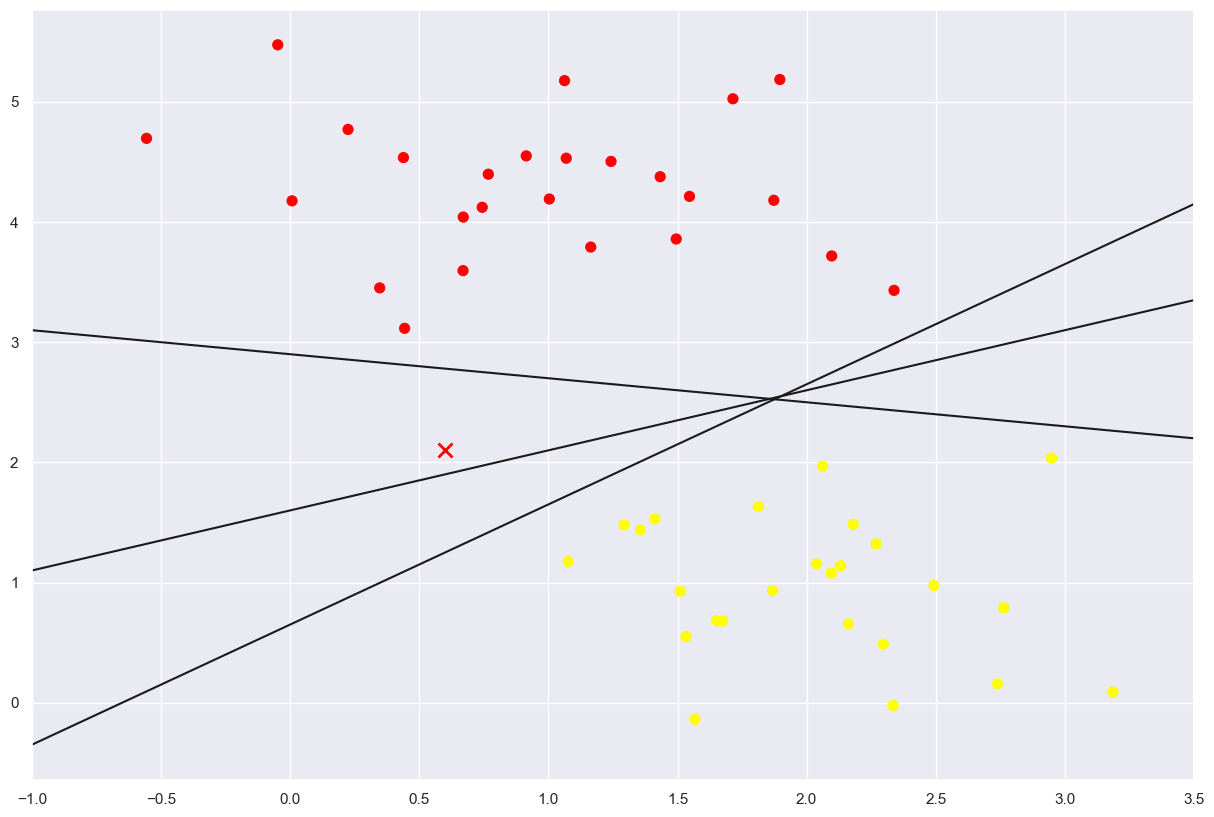

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

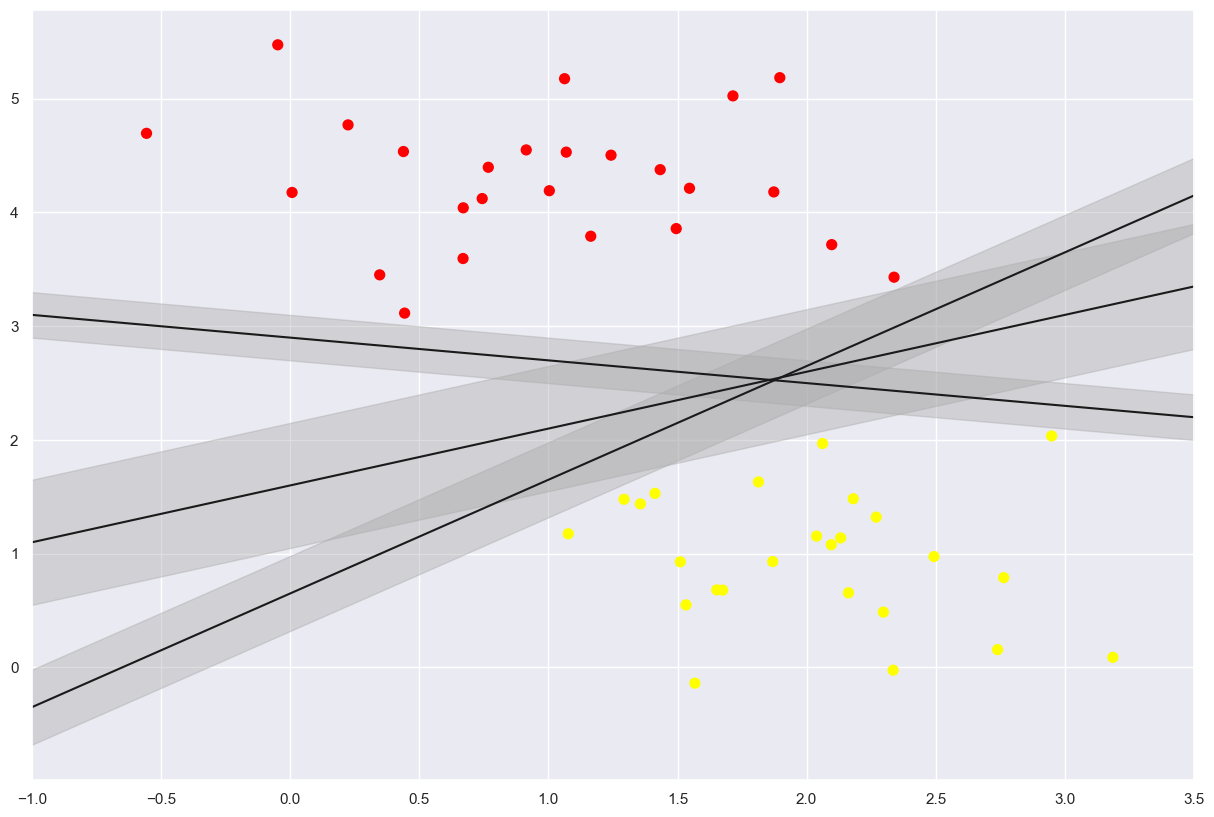

In [6]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [7]:
from sklearn.svm import SVC #Support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,marker='o', linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


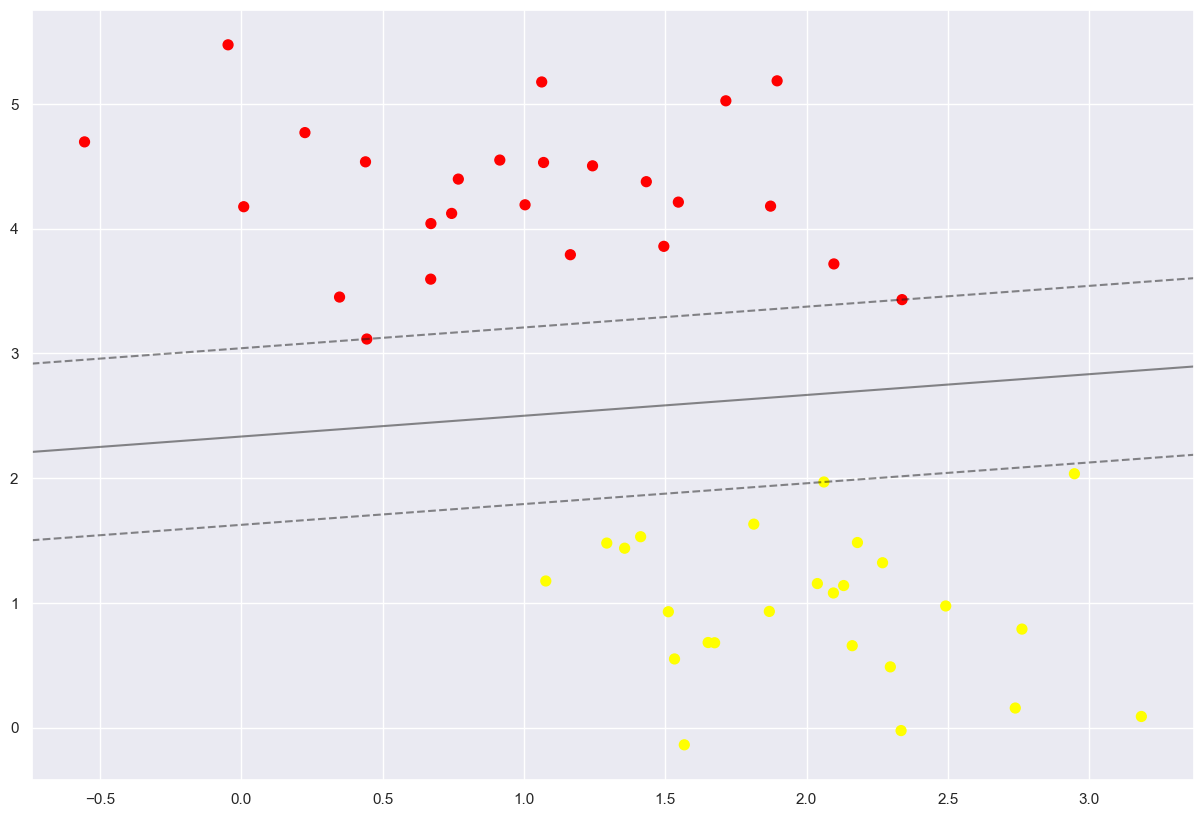

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

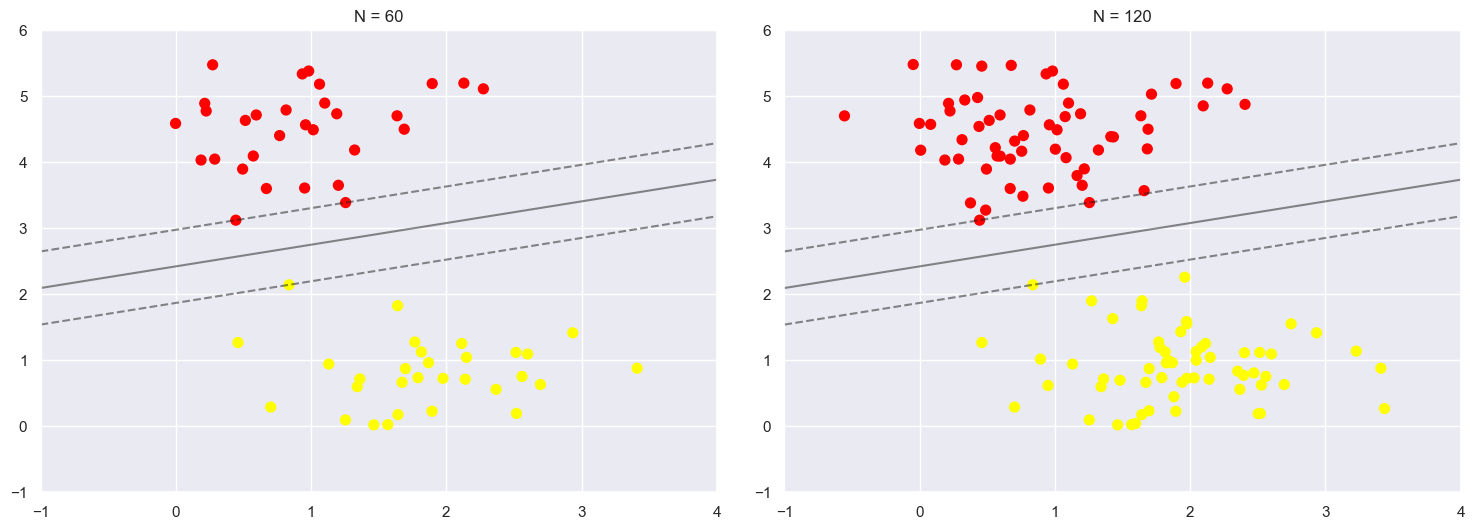

In [11]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50,marker='o', cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [12]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))


interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

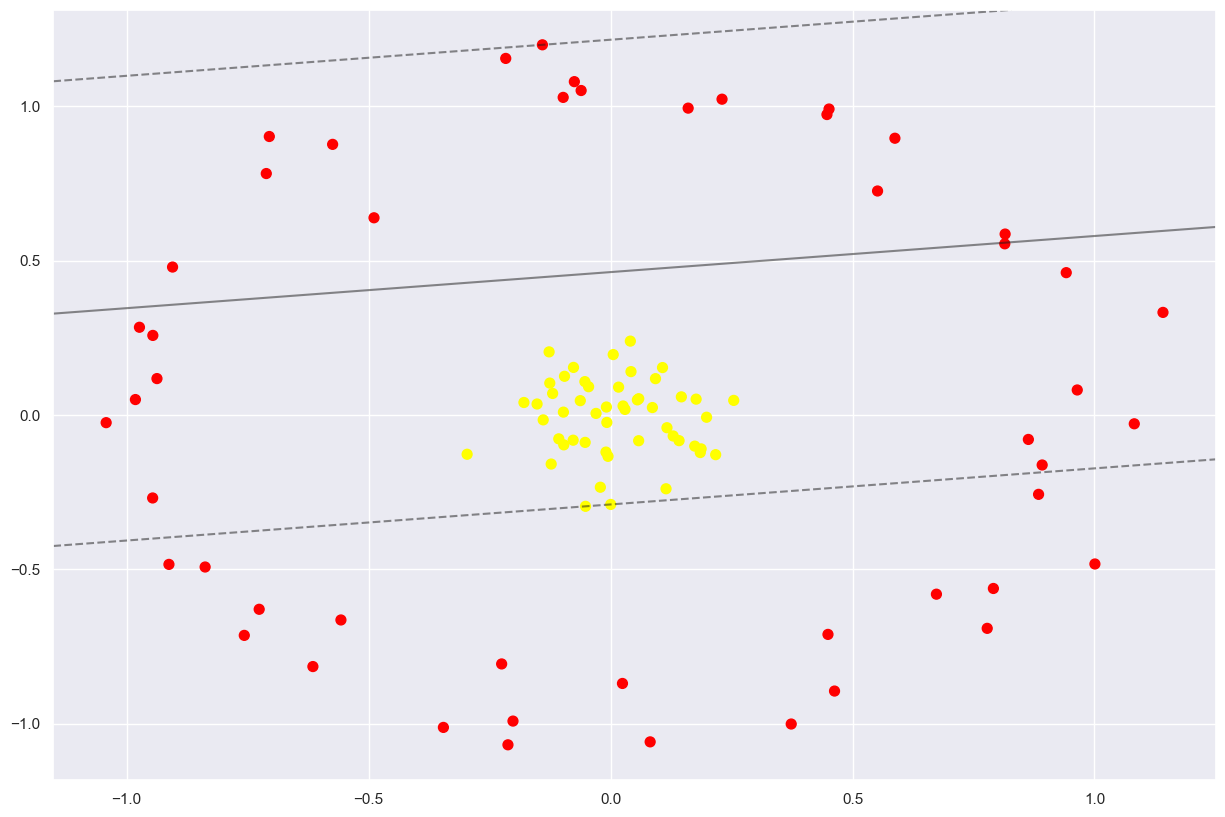

In [13]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)


In [14]:
X

array([[ 9.28051534e-02,  1.17506638e-01],
       [ 4.21592095e-02,  1.40252602e-01],
       [ 3.73263408e-01, -1.00104783e+00],
       [ 5.79867289e-02, -8.35497818e-02],
       [-5.74426185e-01,  8.76222714e-01],
       [-7.26178265e-01, -6.29459791e-01],
       [ 8.91860261e-01, -1.62143931e-01],
       [-9.55877452e-03, -1.20346617e-01],
       [-2.16678327e-01,  1.15456611e+00],
       [-9.46341170e-01, -2.68960940e-01],
       [ 5.81720948e-02,  5.24721645e-02],
       [ 1.60293073e-01,  9.93546453e-01],
       [ 9.41618287e-01,  4.60736055e-01],
       [ 5.87548584e-01,  8.96086584e-01],
       [ 1.29349717e-01, -6.81270227e-02],
       [ 4.49223789e-01, -7.10800238e-01],
       [-1.25649730e-01,  1.03110839e-01],
       [-7.11506962e-01,  7.81717227e-01],
       [-9.81953787e-01,  4.97712182e-02],
       [-3.00896558e-02,  4.87299312e-03],
       [-1.51930356e-01,  3.53672971e-02],
       [-1.79081395e-01,  4.02555406e-02],
       [-4.88911524e-01,  6.38410101e-01],
       [ 4.

In [15]:
1.06909564e-01**2 +  1.09777740e+00**2

1.2165448748254302

In [16]:
(X ** 2).sum(1)

array([2.24206066e-02, 2.14481912e-02, 1.14142233e+00, 1.03430268e-02,
       1.09773169e+00, 9.23554501e-01, 8.21705380e-01, 1.45746785e-02,
       1.37997241e+00, 9.67901596e-01, 6.13732066e-03, 1.01282842e+00,
       1.09892271e+00, 1.14818450e+00, 2.13726406e-02, 7.07038991e-01,
       2.64196998e-02, 1.11732398e+00, 9.66710415e-01, 9.29133446e-04,
       2.43336789e-02, 3.36906545e-02, 6.46601935e-01, 1.01388691e+00,
       8.92625323e-01, 1.96488473e-02, 1.80122944e-02, 3.82185634e-02,
       1.26849983e-02, 7.03365151e-02, 3.50302549e-02, 1.04259101e+00,
       1.04078610e-02, 2.47188277e-02, 6.37141066e-02, 1.08350012e+00,
       1.09860922e+00, 5.78412985e-02, 1.44428815e-02, 1.18524653e+00,
       1.08277554e+00, 1.08725999e+00, 1.04873293e+00, 9.44683662e-01,
       1.14629638e+00, 8.48387708e-01, 1.06657643e-02, 7.51514414e-01,
       8.40392464e-02, 5.52826101e-02, 1.45660286e+00, 3.94032211e-02,
       1.52882067e-02, 1.17052183e+00, 3.38562733e-02, 1.02851804e+00,
      

In [17]:
r = np.exp(-(X ** 2).sum(1))

In [18]:
np.exp(-1.216)

0.2964134525853191

In [19]:
r


array([0.97782887, 0.97878019, 0.31936446, 0.98971028, 0.333627  ,
       0.39710502, 0.43968119, 0.98553102, 0.25158549, 0.37987934,
       0.99388147, 0.36319027, 0.33322988, 0.31721214, 0.97885414,
       0.49310212, 0.97392625, 0.3271541 , 0.38033212, 0.9990713 ,
       0.97596   , 0.96687056, 0.52382274, 0.36280604, 0.40957906,
       0.98054293, 0.98214896, 0.96250255, 0.98739512, 0.93208011,
       0.9655762 , 0.35254006, 0.98964611, 0.97558418, 0.93827321,
       0.33840898, 0.33333436, 0.94379972, 0.98566092, 0.30567081,
       0.33865427, 0.33713899, 0.35038143, 0.38880254, 0.31781165,
       0.42810461, 0.98939091, 0.47165174, 0.91939517, 0.9462177 ,
       0.23302655, 0.96136299, 0.98482806, 0.31020502, 0.96671044,
       0.35753642, 0.34400362, 0.46909845, 0.99396367, 0.35922673,
       0.98268403, 0.39199467, 0.31869147, 0.97549601, 0.93523072,
       0.30532809, 0.4715754 , 0.34393238, 0.9904572 , 0.99849841,
       0.33039027, 0.99879521, 0.24333908, 0.38997484, 0.49605

In [20]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual

Text(0.5, 0, 'r')

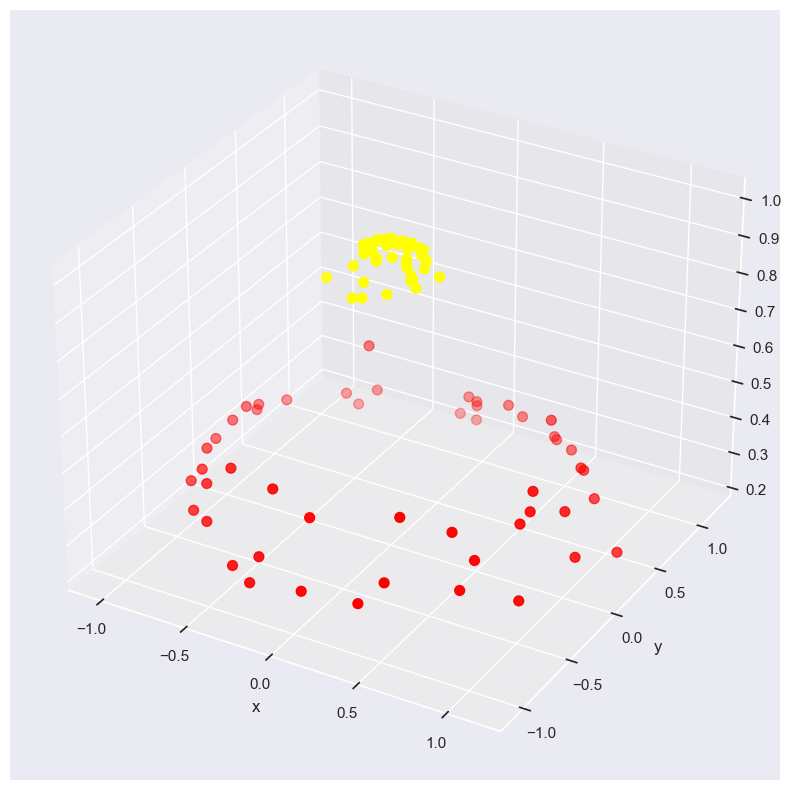

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

# KNN

In [22]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [25]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [26]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

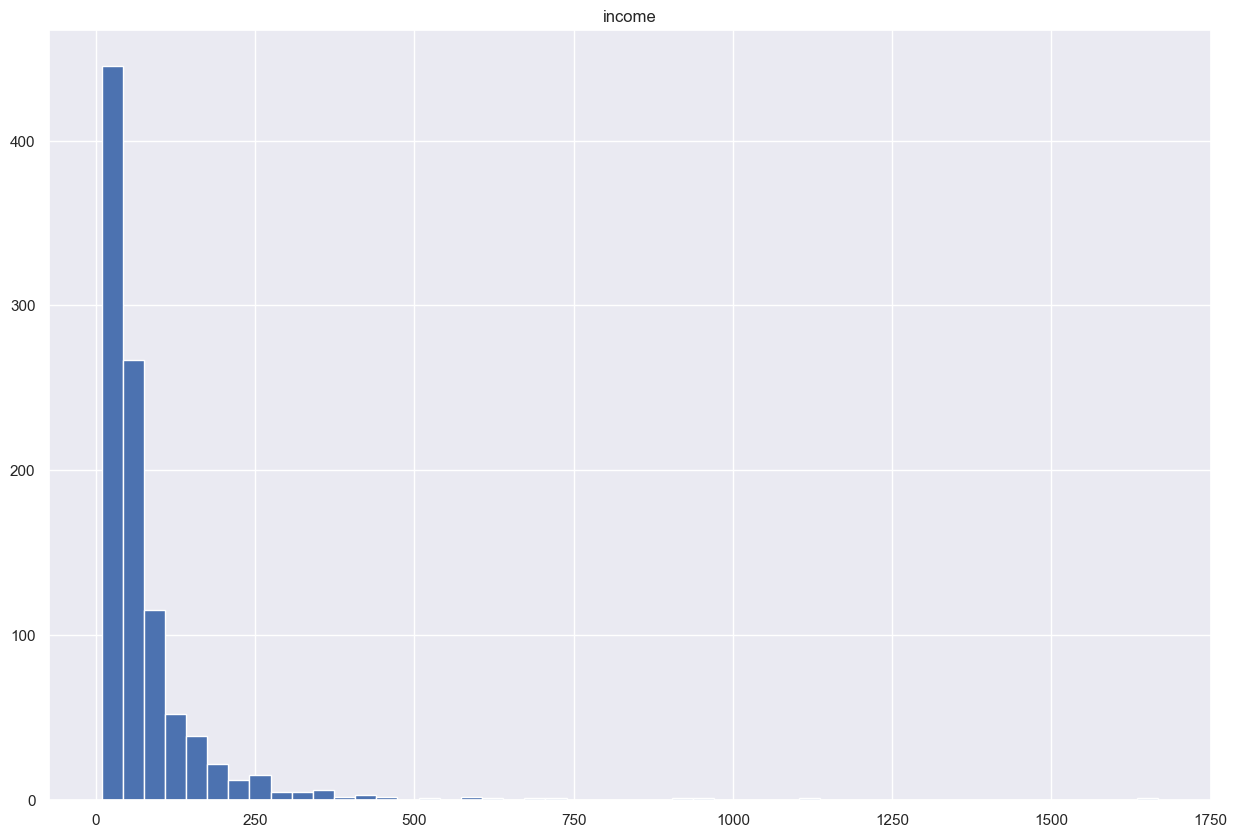

In [27]:
df.hist(column='income', bins=50)

In [28]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [29]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [30]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [31]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [35]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [36]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [37]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

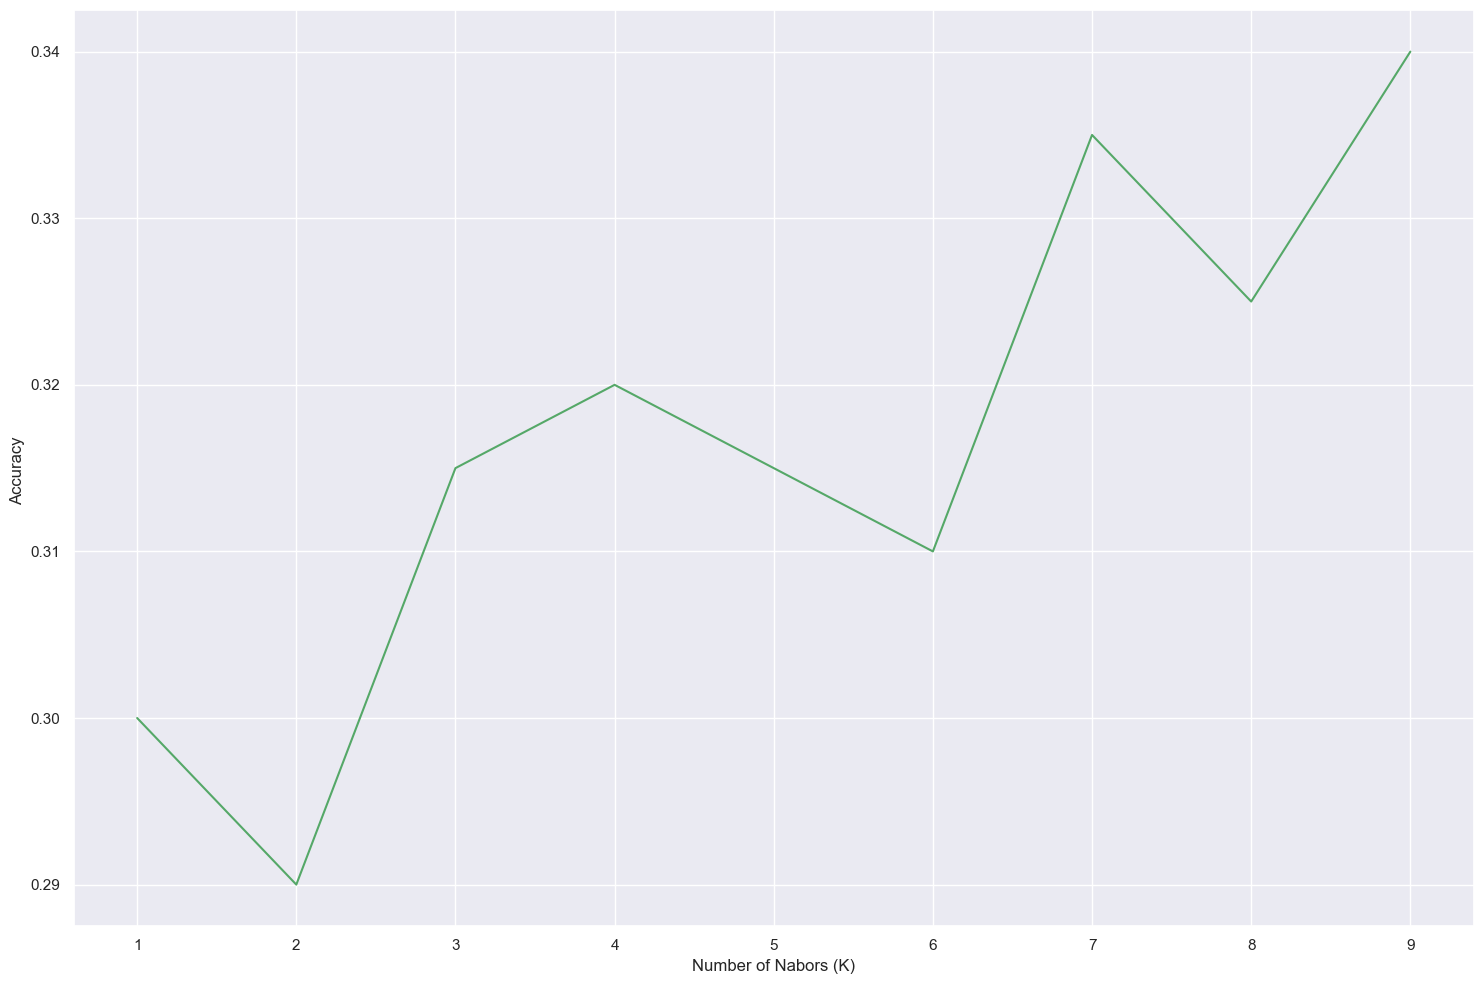

In [38]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [39]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


# Decision Tree Algorithm

In [40]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import metrics

In [41]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [42]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
y = pd.get_dummies(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
dt = DecisionTreeClassifier()

In [51]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

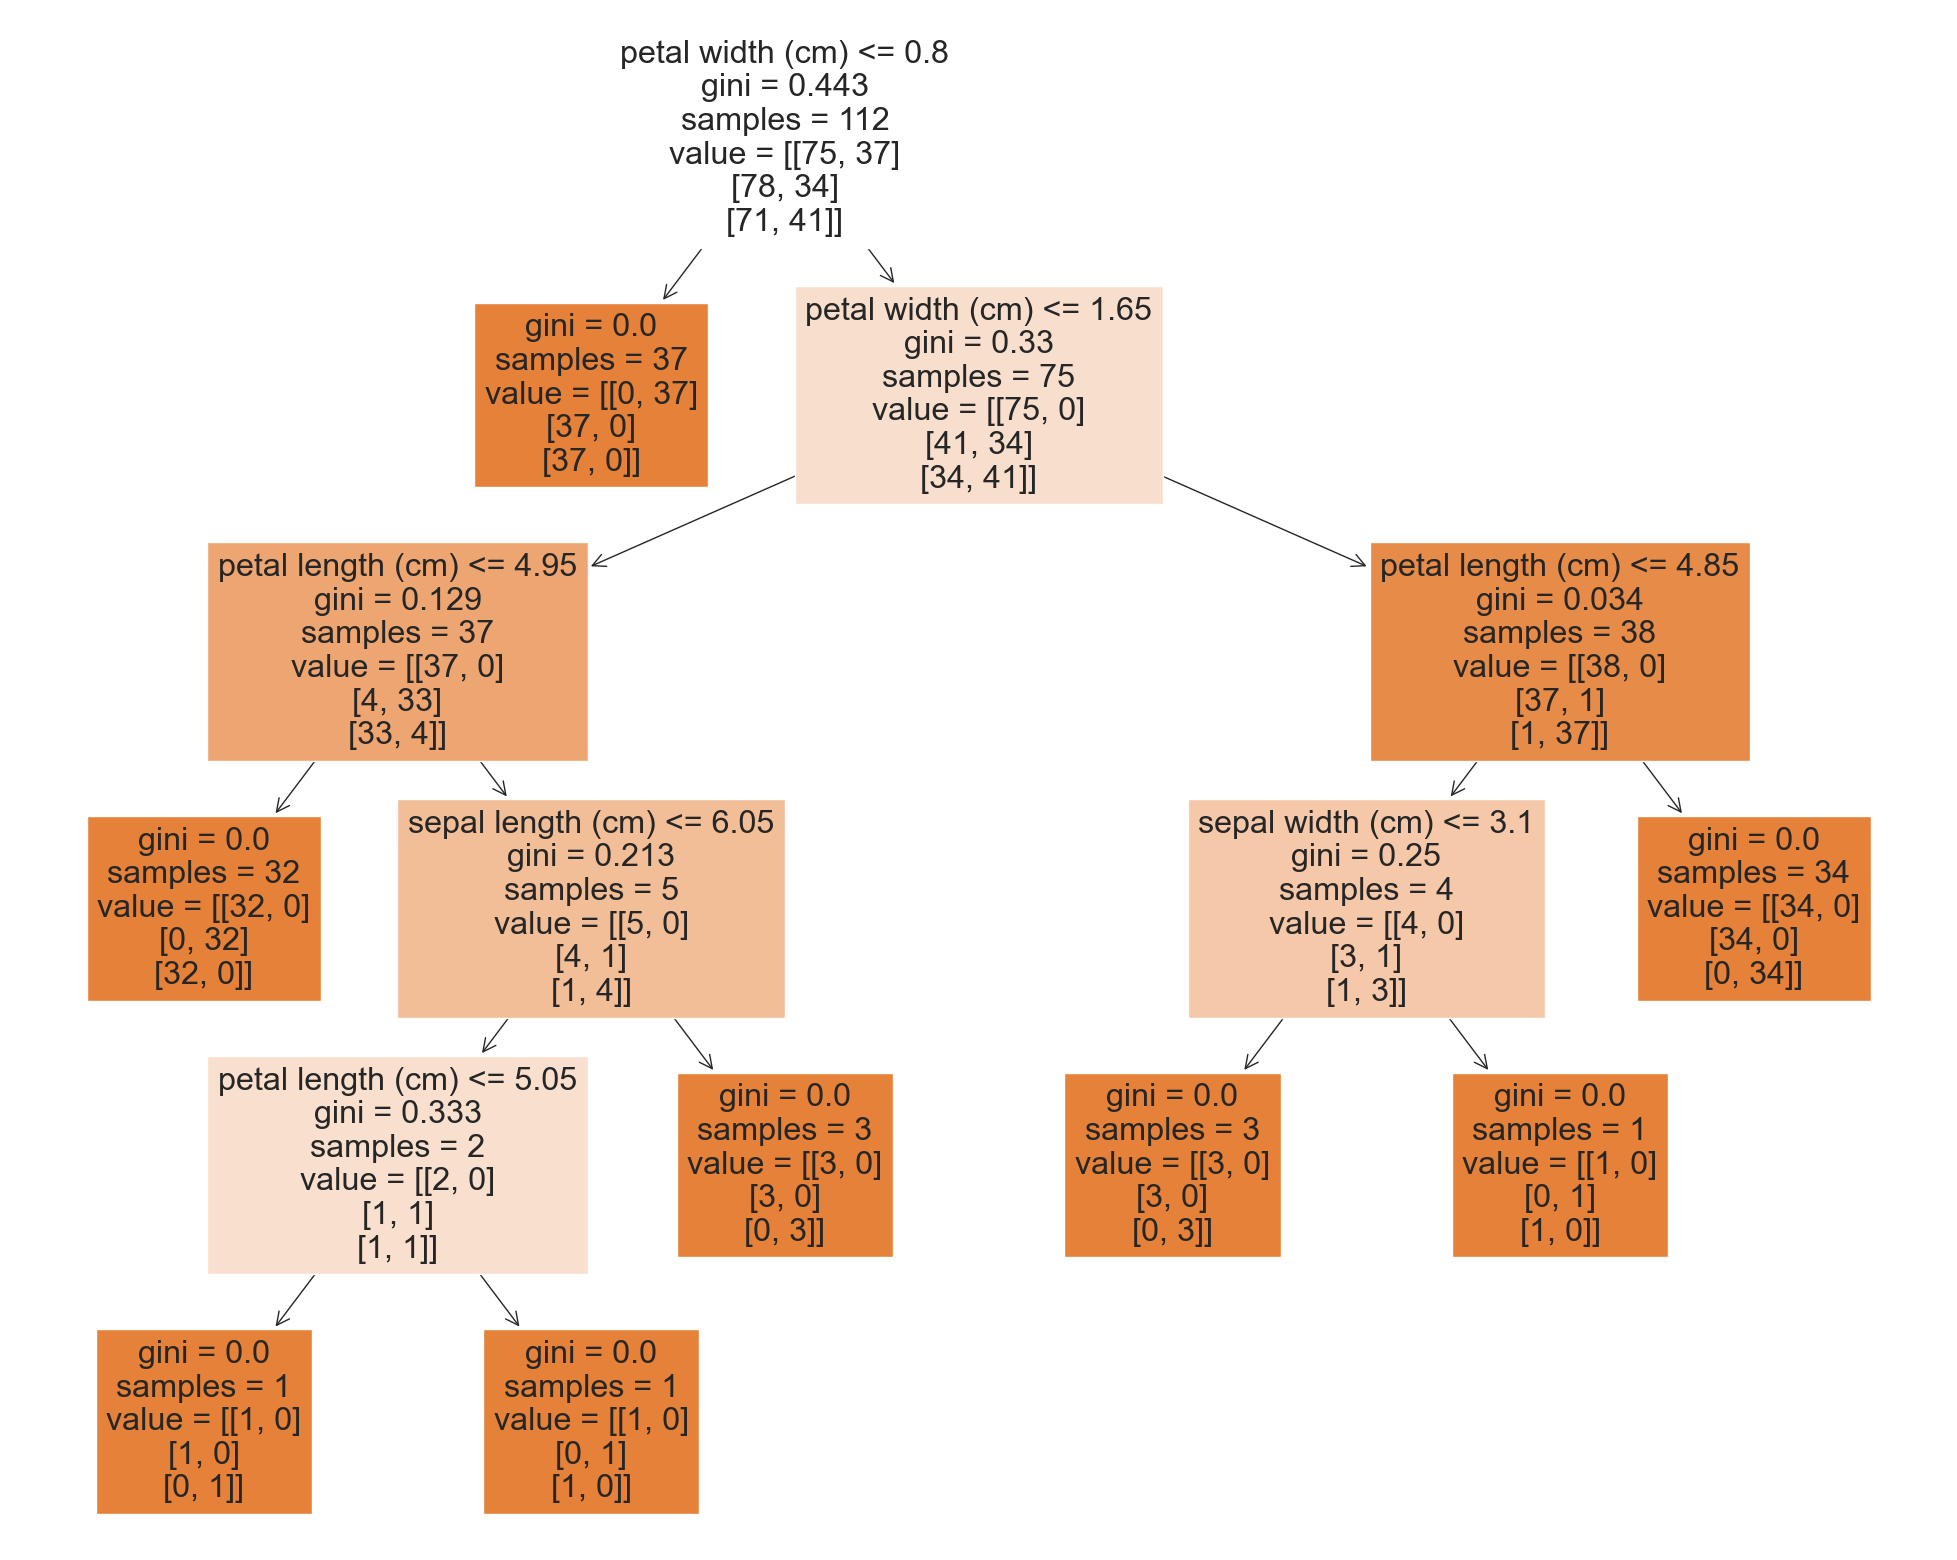

In [55]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=iris.feature_names,  
                   class_names=list(iris.target_names),
                   filled=True)

In [56]:
y_pred = dt.predict(X_test)

In [57]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)